In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

In [282]:
df = pd.read_csv('dataset.csv')

In [283]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


# Generic data about datasets

In [284]:
df.shape

(197428, 14)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

# NULL Values check

In [286]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

# EDA

In [287]:
df.loc[df['market_id'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
45,NaN,2015-02-09 03:27:37,2015-02-09 04:22:18,ea119a40c1592979f51819b0bd38d39d,italian,1.0,2,2400,2,600,1800,94.0,92.0,149.0
182,NaN,2015-02-01 05:32:34,2015-02-01 06:01:21,a87ff679a2f3e71d9181a67b7542122c,mediterranean,3.0,2,1845,2,600,1245,33.0,23.0,30.0
970,NaN,2015-02-17 02:17:43,2015-02-17 03:15:14,fe8c15fed5f808006ce95eddb7366e35,NaN,NaN,3,3400,3,1000,1200,36.0,36.0,52.0
1126,NaN,2015-02-18 03:50:52,2015-02-18 04:15:09,aa2a77371374094fe9e0bc1de3f94ed9,sandwich,2.0,1,1395,1,795,795,89.0,71.0,72.0
1625,NaN,2015-02-17 03:49:46,2015-02-17 04:21:27,86311dbe35f1b6c5166365165602f54d,pizza,NaN,1,1699,1,1399,1399,44.0,40.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196027,NaN,2015-01-24 02:59:19,2015-01-24 04:16:30,84d9ee44e457ddef7f2c4f25dc8fa865,NaN,NaN,2,1998,2,898,999,129.0,130.0,232.0
196561,NaN,2015-02-02 20:49:57,2015-02-02 21:26:34,07042ac7d03d3b9911a00da43ce0079a,NaN,NaN,4,1975,3,250,750,33.0,34.0,40.0
197170,NaN,2015-02-01 01:29:54,2015-02-01 01:50:18,17e62166fc8586dfa4d1bc0e1742c08b,vietnamese,5.0,4,2495,4,350,795,74.0,58.0,64.0
197171,NaN,2015-02-16 19:16:44,2015-02-16 19:56:03,17e62166fc8586dfa4d1bc0e1742c08b,vietnamese,5.0,4,2830,2,195,795,50.0,49.0,56.0


In [288]:
df[['market_id','store_id']]

,market_id,store_id
0,1.0,df263d996281d984952c07998dc54358
1,2.0,f0ade77b43923b38237db569b016ba25
2,3.0,f0ade77b43923b38237db569b016ba25
3,3.0,f0ade77b43923b38237db569b016ba25
4,3.0,f0ade77b43923b38237db569b016ba25
...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877
197424,1.0,a914ecef9c12ffdb9bede64bb703d877
197425,1.0,a914ecef9c12ffdb9bede64bb703d877
197426,1.0,c81e155d85dae5430a8cee6f2242e82c


In [289]:
# df.loc[df['store_id']=='a914ecef9c12ffdb9bede64bb703d877'][['market_id','store_id']].values[0][0],df.loc[df['store_id']=='a914ecef9c12ffdb9bede64bb703d877'][['market_id','store_id']].values[0][1]

In [290]:
store_id_market_id_mapping = df[['store_id','market_id']]
store_id_market_id_mapping = store_id_market_id_mapping.dropna()
store_id_market_id_mapping

,store_id,market_id
0,df263d996281d984952c07998dc54358,1.0
1,f0ade77b43923b38237db569b016ba25,2.0
2,f0ade77b43923b38237db569b016ba25,3.0
3,f0ade77b43923b38237db569b016ba25,3.0
4,f0ade77b43923b38237db569b016ba25,3.0
...,...,...
197423,a914ecef9c12ffdb9bede64bb703d877,1.0
197424,a914ecef9c12ffdb9bede64bb703d877,1.0
197425,a914ecef9c12ffdb9bede64bb703d877,1.0
197426,c81e155d85dae5430a8cee6f2242e82c,1.0


In [291]:
store_id_market_id_mapping

,store_id,market_id
0,df263d996281d984952c07998dc54358,1.0
1,f0ade77b43923b38237db569b016ba25,2.0
2,f0ade77b43923b38237db569b016ba25,3.0
3,f0ade77b43923b38237db569b016ba25,3.0
4,f0ade77b43923b38237db569b016ba25,3.0
...,...,...
197423,a914ecef9c12ffdb9bede64bb703d877,1.0
197424,a914ecef9c12ffdb9bede64bb703d877,1.0
197425,a914ecef9c12ffdb9bede64bb703d877,1.0
197426,c81e155d85dae5430a8cee6f2242e82c,1.0


In [292]:
# tmp = store_id_market_id_mapping.loc[store_id_market_id_mapping['store_id']=='f0ade77b43923b38237db569b016ba25']
 
# tmp.groupby('store_id')['market_id'].apply(lambda x : x.mode().iloc[0]).iloc[0]


In [293]:
from tqdm import tqdm

In [294]:
# def get_store_and_market_id_mapping(store_ids):
#     store_id_and_market_id_mapping = {}
#     for store_id in tqdm(store_ids):
#         tmp_store_id = store_id_market_id_mapping.loc[store_id_market_id_mapping['store_id']==store_id]
#         max_value_market_id = tmp_store_id.groupby('store_id')['market_id'].apply(lambda x : x.mode().iloc[0]).iloc[0]
#         if(store_id not in store_id_and_market_id_mapping.keys()):
#             store_id_and_market_id_mapping[store_id] = max_value_market_id
#     return store_id_and_market_id_mapping

In [295]:
# get_store_and_market_id_mapping = get_store_and_market_id_mapping(set(store_id_market_id_mapping['store_id']))

In [296]:
# list(get_store_and_market_id_mapping.keys())

In [297]:
df_store_id_and_market_id_mapping = pd.read_csv('get_store_and_market_id_mapping.csv')

In [298]:
df_store_id_and_market_id_mapping

,store_id,market_id
0,8e200fc779d0a8e7eaba42e877f0a5c0,5.0
1,1b9e43c170cd3fc59624a18663b8d4d2,2.0
2,e0d2fe50debfaec6b2d7bafdd9d936c8,2.0
3,84f5ddd735176becc72c3b1ff424149e,6.0
4,e57edfc7529f0c7b21788231308caeab,3.0
...,...,...
6735,0e4e946668cf2afc4299b462b812caca,1.0
6736,939b9fed93c76ce9339b8aa1b2d5c57c,6.0
6737,1690bccd010b308cd33989d3819ed96a,3.0
6738,57cd30d9088b0185cf0ebca1a472ff1d,1.0


In [299]:
df['market_id'][197171]

nan

In [300]:
df_store_id_and_market_id_mapping.loc[df_store_id_and_market_id_mapping['store_id']=='ea119a40c1592979f51819b0bd38d39d']['market_id'].values[0]

4.0

# Now Fixing the Missing Market_id

In [301]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [302]:
df.loc[df['market_id'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
45,NaN,2015-02-09 03:27:37,2015-02-09 04:22:18,ea119a40c1592979f51819b0bd38d39d,italian,1.0,2,2400,2,600,1800,94.0,92.0,149.0
182,NaN,2015-02-01 05:32:34,2015-02-01 06:01:21,a87ff679a2f3e71d9181a67b7542122c,mediterranean,3.0,2,1845,2,600,1245,33.0,23.0,30.0
970,NaN,2015-02-17 02:17:43,2015-02-17 03:15:14,fe8c15fed5f808006ce95eddb7366e35,NaN,NaN,3,3400,3,1000,1200,36.0,36.0,52.0
1126,NaN,2015-02-18 03:50:52,2015-02-18 04:15:09,aa2a77371374094fe9e0bc1de3f94ed9,sandwich,2.0,1,1395,1,795,795,89.0,71.0,72.0
1625,NaN,2015-02-17 03:49:46,2015-02-17 04:21:27,86311dbe35f1b6c5166365165602f54d,pizza,NaN,1,1699,1,1399,1399,44.0,40.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196027,NaN,2015-01-24 02:59:19,2015-01-24 04:16:30,84d9ee44e457ddef7f2c4f25dc8fa865,NaN,NaN,2,1998,2,898,999,129.0,130.0,232.0
196561,NaN,2015-02-02 20:49:57,2015-02-02 21:26:34,07042ac7d03d3b9911a00da43ce0079a,NaN,NaN,4,1975,3,250,750,33.0,34.0,40.0
197170,NaN,2015-02-01 01:29:54,2015-02-01 01:50:18,17e62166fc8586dfa4d1bc0e1742c08b,vietnamese,5.0,4,2495,4,350,795,74.0,58.0,64.0
197171,NaN,2015-02-16 19:16:44,2015-02-16 19:56:03,17e62166fc8586dfa4d1bc0e1742c08b,vietnamese,5.0,4,2830,2,195,795,50.0,49.0,56.0


In [303]:
def get_new_market_id(market_id,store_id):
    """
    This Function is helping to get fix market_id
    """
    new_market_id = []
    for market_id,store_id in zip(market_id,store_id):
        if(pd.isna(market_id)==True):
            if(len(df_store_id_and_market_id_mapping.loc[df_store_id_and_market_id_mapping['store_id']==store_id]['market_id'].values)!=0):
                new_market_id.append(df_store_id_and_market_id_mapping.loc[df_store_id_and_market_id_mapping['store_id']==store_id]['market_id'].values[0])
            else:
                new_market_id.append(np.nan)
        else:
            new_market_id.append(market_id)
    return new_market_id


new_market_id = get_new_market_id(df['market_id'],df['store_id']) 

print(len(new_market_id))
        


197428


In [304]:
df['new_market_id'] = new_market_id

In [305]:
df['market_id'] = new_market_id

In [306]:
df.drop('new_market_id',axis=1,inplace=True)

# We have fixed market_id upto some extent

In [307]:
df.isna().sum()

market_id                       3
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [308]:
from sklearn.impute import SimpleImputer

In [309]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')


In [310]:
df['market_id'] = imputer.fit_transform(pd.DataFrame(df['market_id']))

In [311]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [312]:
df.isna().sum()

market_id                       0
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [313]:
df.loc[df['actual_delivery_time'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
109,3.0,2015-02-10 21:51:54,NaN,da353f402faf6cf475d4abd1450b0882,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0
7670,2.0,2015-02-08 02:54:42,NaN,140f6969d5213fd0ece03148e62e461e,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0
78511,4.0,2015-02-15 02:15:45,NaN,1f0e3dad99908345f7439f8ffabdffc4,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0
115982,4.0,2015-02-16 01:52:49,NaN,b92894e4589f652dc3116cb3a8c48c08,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0
140635,2.0,2015-02-15 02:21:42,NaN,0d73a25092e5c1c9769a9f3255caa65a,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0
158967,2.0,2015-02-01 01:21:29,NaN,faacbcd5bf1d018912c116bf2783e9a1,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0
170416,5.0,2015-02-01 01:36:33,NaN,6c7a107981f9c2a0ed55efce297bd1e2,fast,4.0,3,982,3,165,575,41.0,31.0,31.0


# Fixing actual delivery time NAN Values

In [314]:
df['actual_delivery_time'] = df['actual_delivery_time'].ffill(axis=0)

In [315]:
df.isna().sum()

market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [316]:
df.loc[df['store_primary_category'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197210,1.0,2015-02-15 02:17:39,2015-02-15 03:21:16,77c493ec14246d748db3ee8fce0092db,NaN,1.0,3,2800,3,700,1400,24.0,22.0,25.0
197211,1.0,2015-02-03 01:58:27,2015-02-03 02:32:07,77c493ec14246d748db3ee8fce0092db,NaN,1.0,2,1400,2,700,700,22.0,22.0,24.0
197212,1.0,2015-02-12 02:42:13,2015-02-12 03:39:29,77c493ec14246d748db3ee8fce0092db,NaN,1.0,5,2800,5,300,700,28.0,28.0,21.0
197259,5.0,2015-02-10 01:32:37,2015-02-10 02:02:09,959776b99b006e5785c3a3364949ce47,NaN,NaN,1,849,1,849,849,25.0,13.0,20.0


# Fixing NAN value for store primary category

In [317]:
store_id_and_store_primary_cate = df[['store_id','store_primary_category']]

In [318]:
store_id_and_store_primary_cate.dropna(inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_14360\4249315177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_id_and_store_primary_cate.dropna(inplace=True)


In [319]:
store_id_and_store_primary_cate.head()

,store_id,store_primary_category
0,df263d996281d984952c07998dc54358,american
1,f0ade77b43923b38237db569b016ba25,mexican
8,f0ade77b43923b38237db569b016ba25,indian
14,ef1e491a766ce3127556063d49bc2f98,italian
15,ef1e491a766ce3127556063d49bc2f98,italian


In [320]:
store_id_and_store_primary_cate.groupby(['store_id'])['store_primary_category'].apply(lambda x : x.mode().iloc[0])

store_id
0004d0b59e19461ff126e3a08a814c33         american
00053f5e11d1fe4e49a221165b39abc9          mexican
0006aabe0ba47a35c0b0bf6596f85159            other
000a91f3e374e6147d58ed1814247508          mexican
0029f088c57ad3b6ec589f9ba4f7a057           burger
                                        ...      
ffbd6cbb019a1413183c8d08f2929307          chinese
ffc58105bf6f8a91aba0fa2d99e6f106         sandwich
ffd52f3c7e12435a724a8f30fddadd9c            irish
ffeabd223de0d4eacb9a3e6e53e5448d        breakfast
ffedf5be3a86e2ee281d54cdc97bc1cf    mediterranean
Name: store_primary_category, Length: 6569, dtype: object

In [321]:
def get_store_and_store_primary_category_mapping(store_ids):
    """
    Get store and store primary category mapping

    """
    store_and_store_primary_category = {}
    for store_id in tqdm(store_ids):
        tmp_store_id = store_id_and_store_primary_cate.loc[store_id_and_store_primary_cate['store_id']==store_id]
        max_value_market_id = tmp_store_id.groupby('store_id')['store_primary_category'].apply(lambda x : x.mode().iloc[0]).iloc[0]
        if(store_id not in store_and_store_primary_category.keys()):
            store_and_store_primary_category[store_id] = max_value_market_id
    return store_and_store_primary_category

get_store_and_store_primary_category_mapping = get_store_and_store_primary_category_mapping(set(store_id_and_store_primary_cate['store_id']))

  0%|          | 0/6569 [00:00<?, ?it/s]

  2%|▏         | 119/6569 [00:01<01:11, 90.74it/s]


KeyboardInterrupt: 

In [ ]:
get_store_and_store_primary_category_mapping

get_store_and_store_primary_category_mapping_df = pd.DataFrame()

get_store_and_store_primary_category_mapping_df['store_id'] = list(get_store_and_store_primary_category_mapping.keys())

get_store_and_store_primary_category_mapping_df['store_primary_category'] = list(get_store_and_store_primary_category_mapping.values())

In [ ]:
get_store_and_store_primary_category_mapping_df

,store_id,store_primary_category
0,46e0eae7d5217c79c3ef6b4c212b8c6f,sandwich
1,e4d78a6b4d93e1d79241f7b282fa3413,cafe
2,248e844336797ec98478f85e7626de4a,alcohol
3,670c26185a3783678135b4697f7dbd1a,fast
4,021b8947656eb84e4c641506215777c8,japanese
...,...,...
6564,0b61a4e863c0f5e7e20001aea1c33962,alcohol
6565,9b40aee76034c9543ceacba5df759a1d,burger
6566,d79f7940be5afa4e3fa70cd73295878f,thai
6567,6a8018b3a00b69c008601b8becae392b,thai


In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
def get_new_store_primary_category():
    store_primary_category=[]
    for store_primary_cate,store_id in zip(df['store_primary_category'],df['store_id']):
        if(pd.isna(store_primary_cate)==True):
            if(len(get_store_and_store_primary_category_mapping_df.loc[get_store_and_store_primary_category_mapping_df['store_id']==store_id]['store_primary_category'].values)!=0):
                store_primary_category.append(get_store_and_store_primary_category_mapping_df.loc[get_store_and_store_primary_category_mapping_df['store_id']==store_id]['store_primary_category'].values[0])
            else:
                store_primary_category.append(np.nan)
        else:
            store_primary_category.append(store_primary_cate)
    return store_primary_category
        


get_new_store_primary_category = get_new_store_primary_category()
len(get_new_store_primary_category)

197428

In [ ]:
df['get_new_store_primary_category'] = get_new_store_primary_category

In [ ]:
df.isna().sum()

market_id                             0
created_at                            0
actual_delivery_time                  0
store_id                              0
store_primary_category             4760
order_protocol                      995
total_items                           0
subtotal                              0
num_distinct_items                    0
min_item_price                        0
max_item_price                        0
total_onshift_partners            16262
total_busy_partners               16262
total_outstanding_orders          16262
get_new_store_primary_category      867
dtype: int64

In [ ]:
pd.DataFrame(df['get_new_store_primary_category'])

,get_new_store_primary_category
0,american
1,mexican
2,indian
3,indian
4,indian
...,...
197423,fast
197424,fast
197425,fast
197426,sandwich


In [ ]:
valus = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(pd.DataFrame(df['get_new_store_primary_category']))

get_new_store_primary_category = []
for v in valus:
    get_new_store_primary_category.append(v[0])
df['get_new_store_primary_category'] = get_new_store_primary_category
df['store_primary_category'] = df['get_new_store_primary_category']
df.drop('get_new_store_primary_category',axis=1,inplace=True)

In [ ]:
df['order_protocol'] = imputer.fit_transform(pd.DataFrame(df['order_protocol']))


In [ ]:
df.isna().sum()

market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
df.loc[df['total_onshift_partners'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN


In [ ]:
df['total_onshift_partners'] = SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(pd.DataFrame(df['total_onshift_partners']))
df['total_busy_partners'] = SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(pd.DataFrame(df['total_busy_partners']))
df['total_outstanding_orders'] = SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(pd.DataFrame(df['total_outstanding_orders']))

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.978296,2.872865,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.164946,41.102230,56.645663
std,1.524646,1.505888,2.666546,1823.093688,1.630255,522.038648,558.411377,33.143840,30.866801,50.663676
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


# Fixed all NAN value issues.

In [ ]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [583]:
# saving fixed data for futher analysis and ML modeling
# df.to_csv('market.csv',index=False)

In [586]:
df = pd.read_csv('market.csv')

In [587]:
df.shape

(197421, 15)

In [588]:
df.isna().sum()

market_id                            0
created_at                           0
actual_delivery_time                 0
store_id                             0
store_primary_category               0
order_protocol                       0
total_items                          0
subtotal                             0
num_distinct_items                   0
min_item_price                       0
max_item_price                       0
total_onshift_partners               0
total_busy_partners                  0
total_outstanding_orders             0
delivery_time_gt_created_at_check    0
dtype: int64

In [589]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_gt_created_at_check
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,True
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,True
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,True
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,True
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197416,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,True
197417,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,True
197418,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,True
197419,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,True


In [590]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# QC on created_at and actual_delivery_time

In [591]:
# df_created_at_and_actual_delivery_time = df[['created_at','actual_delivery_time']]

In [592]:
# df_created_at_and_actual_delivery_time
# df_created_at_and_actual_delivery_time['check'] = (df_created_at_and_actual_delivery_time['created_at']<=df_created_at_and_actual_delivery_time['actual_delivery_time'])

In [593]:
# df_created_at_and_actual_delivery_time

In [594]:
# df_created_at_and_actual_delivery_time['check'].value_counts()

In [595]:
# df_created_at_and_actual_delivery_time.loc[df_created_at_and_actual_delivery_time['check']==False]

In [596]:
# df['delivery_time_gt_created_at_check'] = (df['created_at']<=df['actual_delivery_time'])

In [597]:
# df = df.loc[df['delivery_time_gt_created_at_check']==True]

In [598]:
# df.to_csv('market.csv',index=False)

In [599]:
df.shape

(197421, 15)

# Univariate Data Analysis

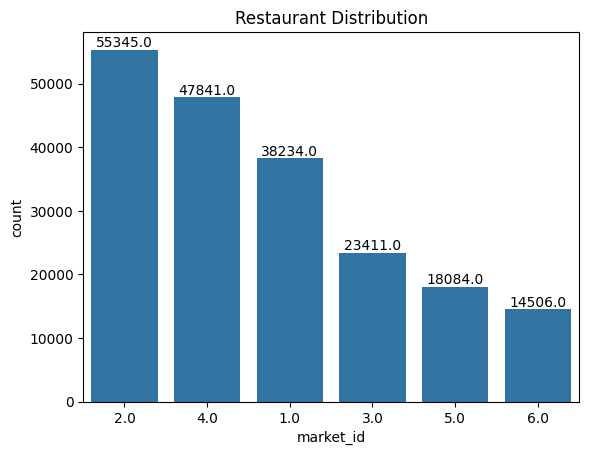

In [600]:
# Create the countplot
ax = sns.countplot(x=df['market_id'],order=df['market_id'].value_counts().index)

# Add numbers above the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Set the title
plt.title('Restaurant Distribution')

# Show the plot
plt.show()

`It is observed that most of the restaurants are located in market 2`

# Top 10 Store Primary Categories

C:\Users\gaura\AppData\Local\Temp\ipykernel_26344\2251548322.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


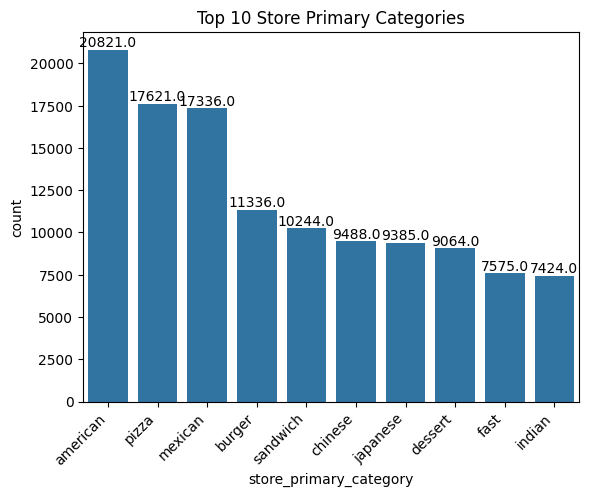

In [601]:
ax = sns.barplot(x=df['store_primary_category'].value_counts()[:10].index,
                 y=df['store_primary_category'].value_counts()[:10])

# Rotate x labels to 30 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Set the title
plt.title('Top 10 Store Primary Categories')

# Show the plot
plt.show()

# Order Protocol Distribution

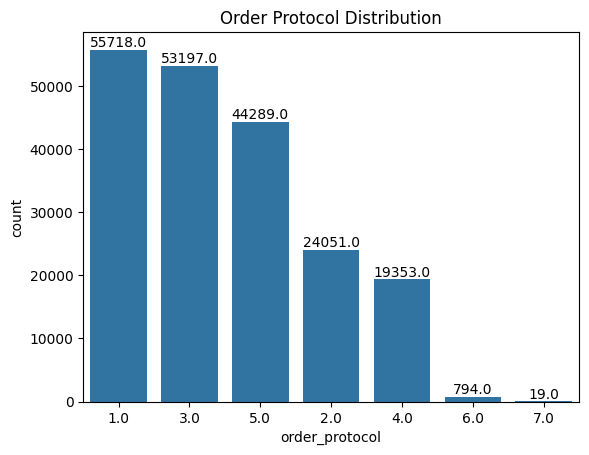

In [602]:
# Create the countplot
ax = sns.countplot(x=df['order_protocol'],order=df['order_protocol'].value_counts().index)

# Add numbers above the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Set the title
plt.title('Order Protocol Distribution')

# Show the plot
plt.show()

`Maximum order have got from 1 followed by 3 and 5`

In [603]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_gt_created_at_check
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,True
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,True
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,True
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,True
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,True


In [604]:
df['delivery_time_minutes'] = round((df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60,2)


In [605]:
df['day_of_week']  = df['created_at'].dt.day_of_week

In [606]:
df['order_created_month'] = df['created_at'].dt.month

df['order_created_hour'] = df['created_at'].dt.hour

df['order_delivery_hour'] = df['actual_delivery_time'].dt.hour

df['time_taken_to_delivery_hour'] = abs(df['order_delivery_hour'] - df['order_created_hour'])



In [607]:
df.drop(['store_id','delivery_time_gt_created_at_check'],axis=1,inplace=True)

In [608]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_minutes,day_of_week,order_created_month,order_created_hour,order_delivery_hour,time_taken_to_delivery_hour
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,4,2,22,23,1
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,1,2,21,22,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,3,1,20,21,1
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,1,2,21,22,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,6,2,2,3,1


In [609]:
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

# EDA for Numeric Columns

In [610]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_minutes,day_of_week,order_created_month,order_created_hour,order_delivery_hour,time_taken_to_delivery_hour
count,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000
mean,2.978290,2.872871,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.163797,41.101327,56.643690,48.470949,3.218923,1.653157,8.467362,8.539406,1.453650
std,1.524658,1.505892,2.666552,1823.106256,1.630261,522.044061,558.416236,33.142936,30.866192,50.661857,320.493483,2.045759,0.476349,8.658781,8.356449,3.817393
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.680000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,35.070000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,44.330000,3.000000,2.000000,3.000000,4.000000,1.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,56.350000,5.000000,2.000000,19.000000,19.000000,1.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,141947.650000,6.000000,10.000000,23.000000,23.000000,23.000000


# Skewness Analysis for Subtotal Feature

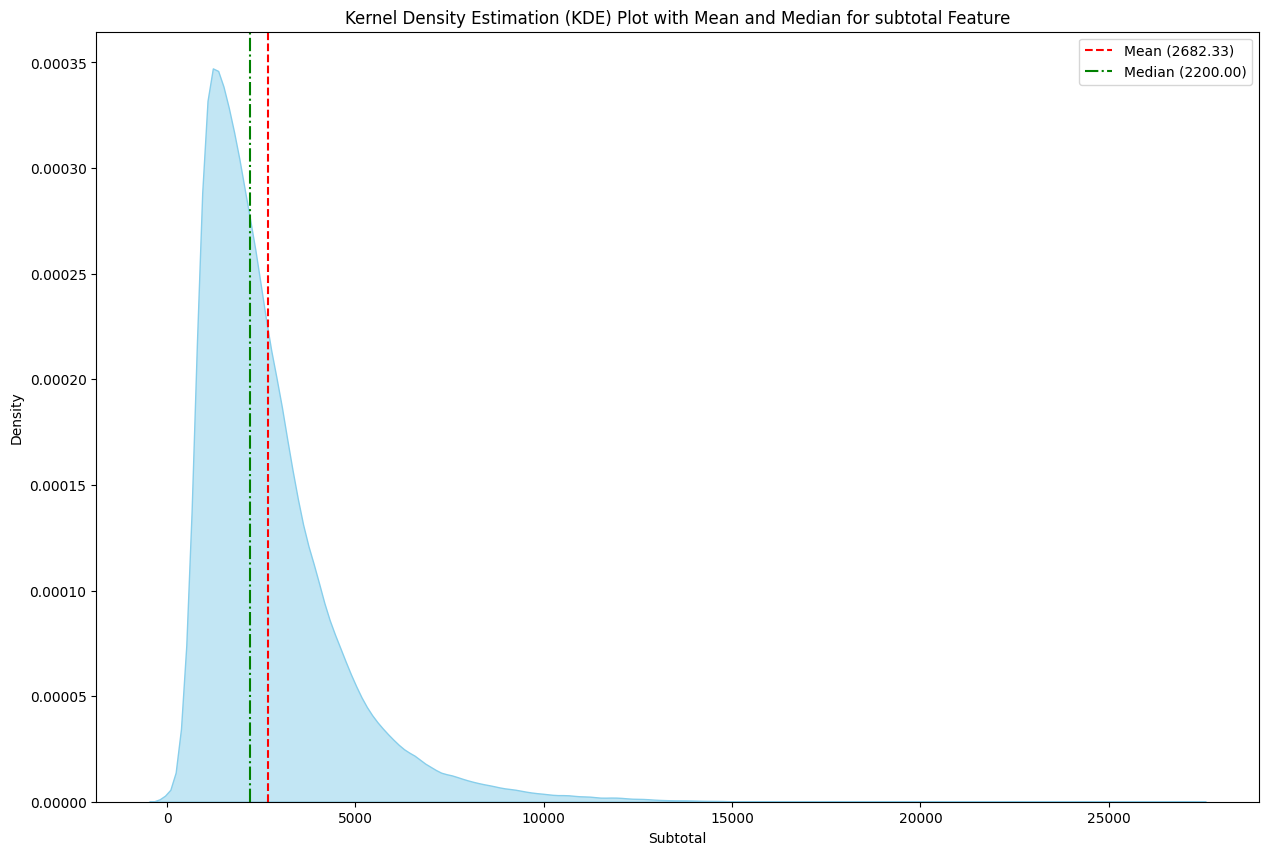

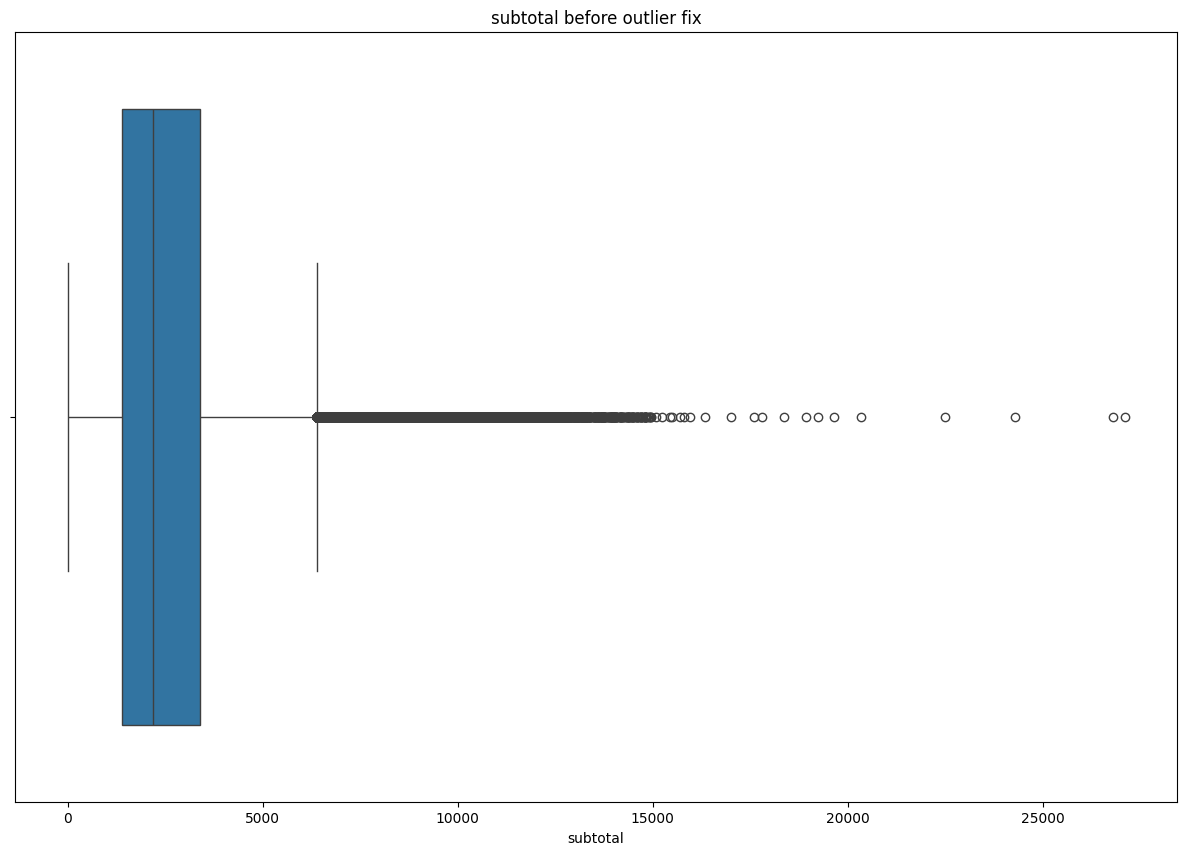

In [611]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='subtotal', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['subtotal'])
median_val = np.median(df['subtotal'])

# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('Subtotal')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot with Mean and Median for subtotal Feature')

# Show legend
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(15,10))
plt.title('subtotal before outlier fix')
sns.boxplot(x=df['subtotal'])
plt.show()

# Using IQR Method to remove outliers

In [612]:
q1 = df['subtotal'].quantile(0.25)
q3 = df['subtotal'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['subtotal'] = np.where(df['subtotal']>right_wisker,right_wisker,df['subtotal'])

left, right wisker : (-1592.5, 6387.5)


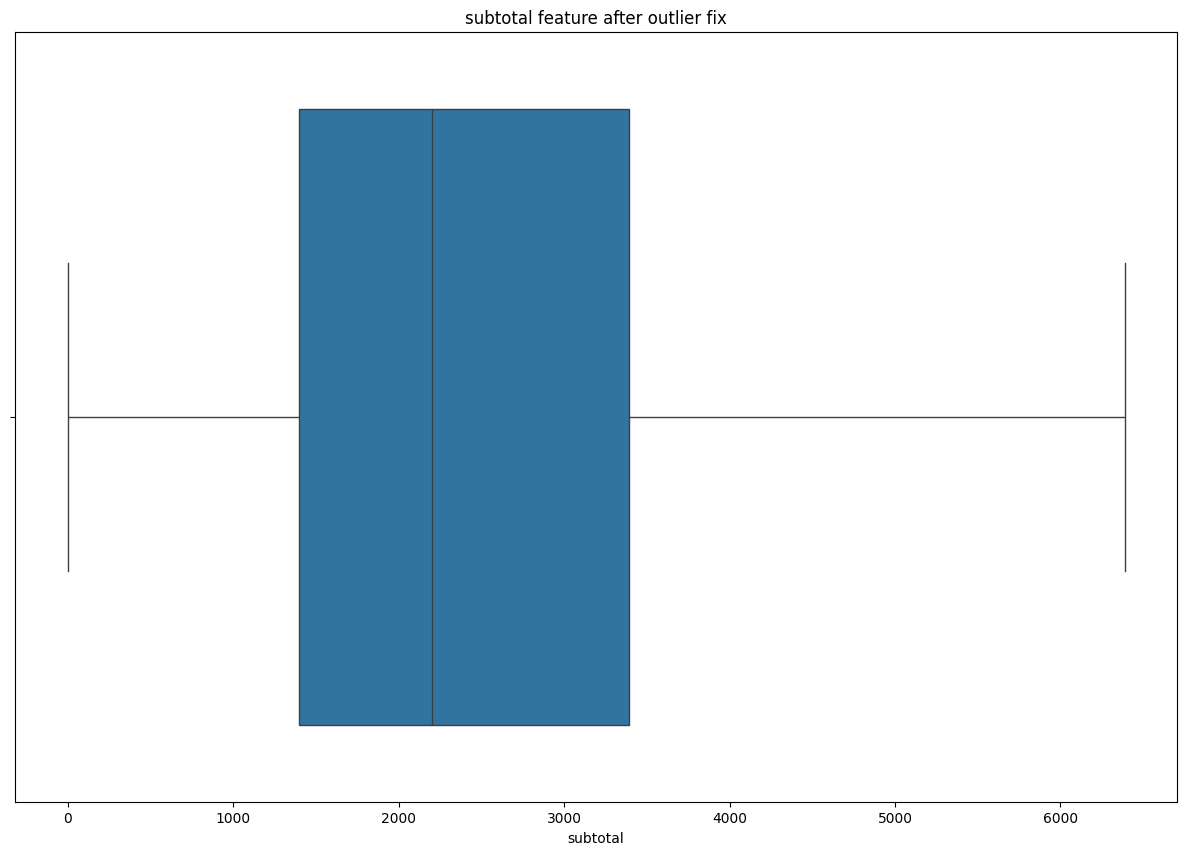

In [613]:
plt.figure(figsize=(15,10))
plt.title('subtotal feature after outlier fix')
sns.boxplot(x=df['subtotal'])
plt.show()

## Skewness Analysis for Min Item Price Feature

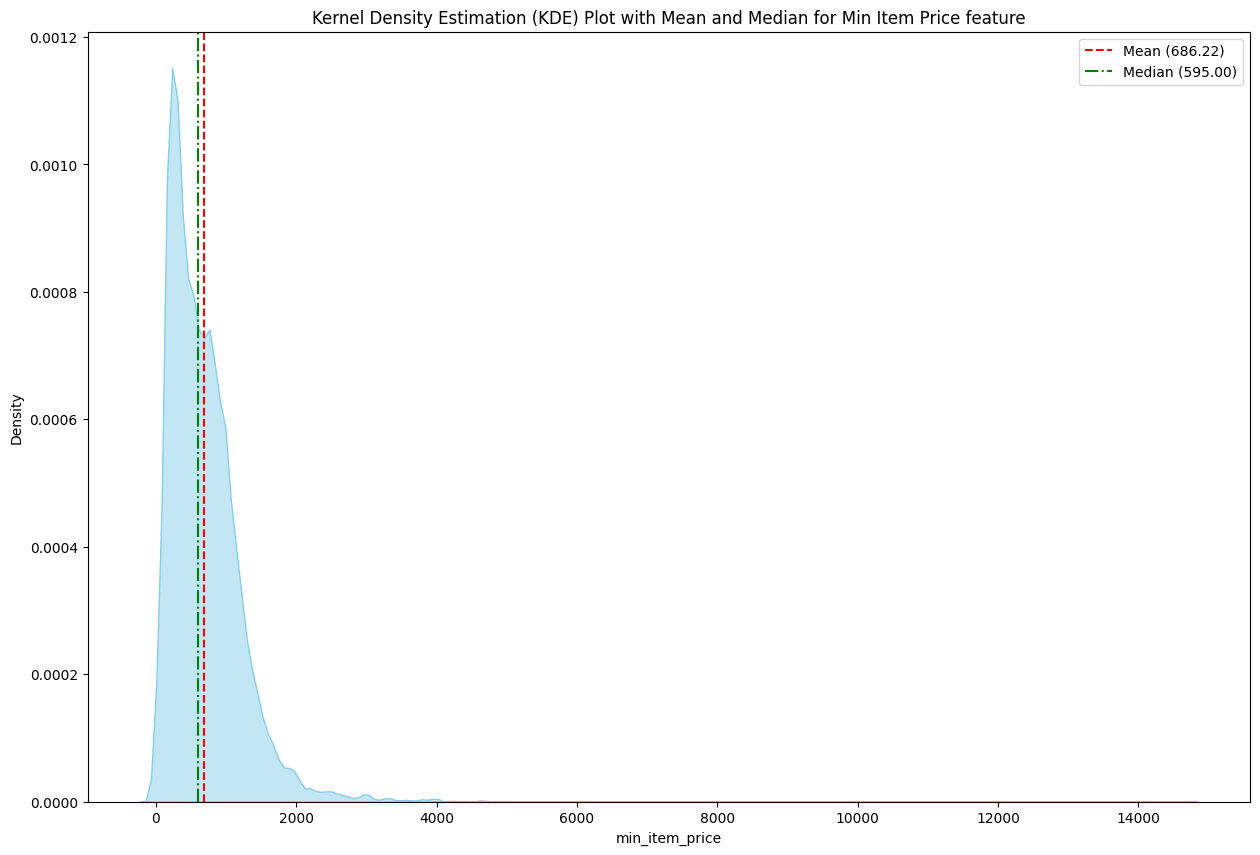

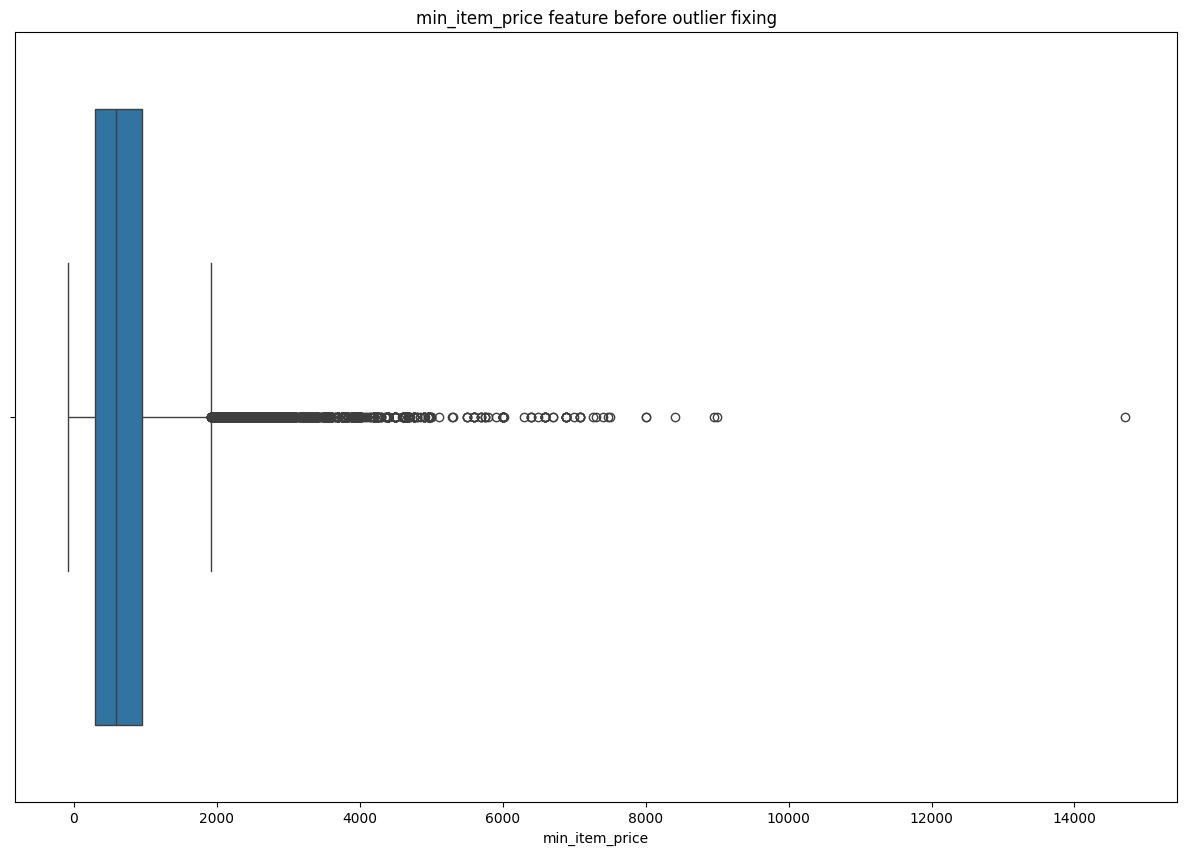

In [614]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='min_item_price', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['min_item_price'])
median_val = np.median(df['min_item_price'])

# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('min_item_price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot with Mean and Median for Min Item Price feature')

# Show legend
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(15,10))
plt.title('min_item_price feature before outlier fixing')
sns.boxplot(x=df['min_item_price'])
plt.show()

In [615]:
q1 = df['min_item_price'].quantile(0.25)
q3 = df['min_item_price'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['min_item_price'] = np.where(df['min_item_price']>right_wisker,right_wisker,df['min_item_price'])

left, right wisker : (-676.0, 1924.0)


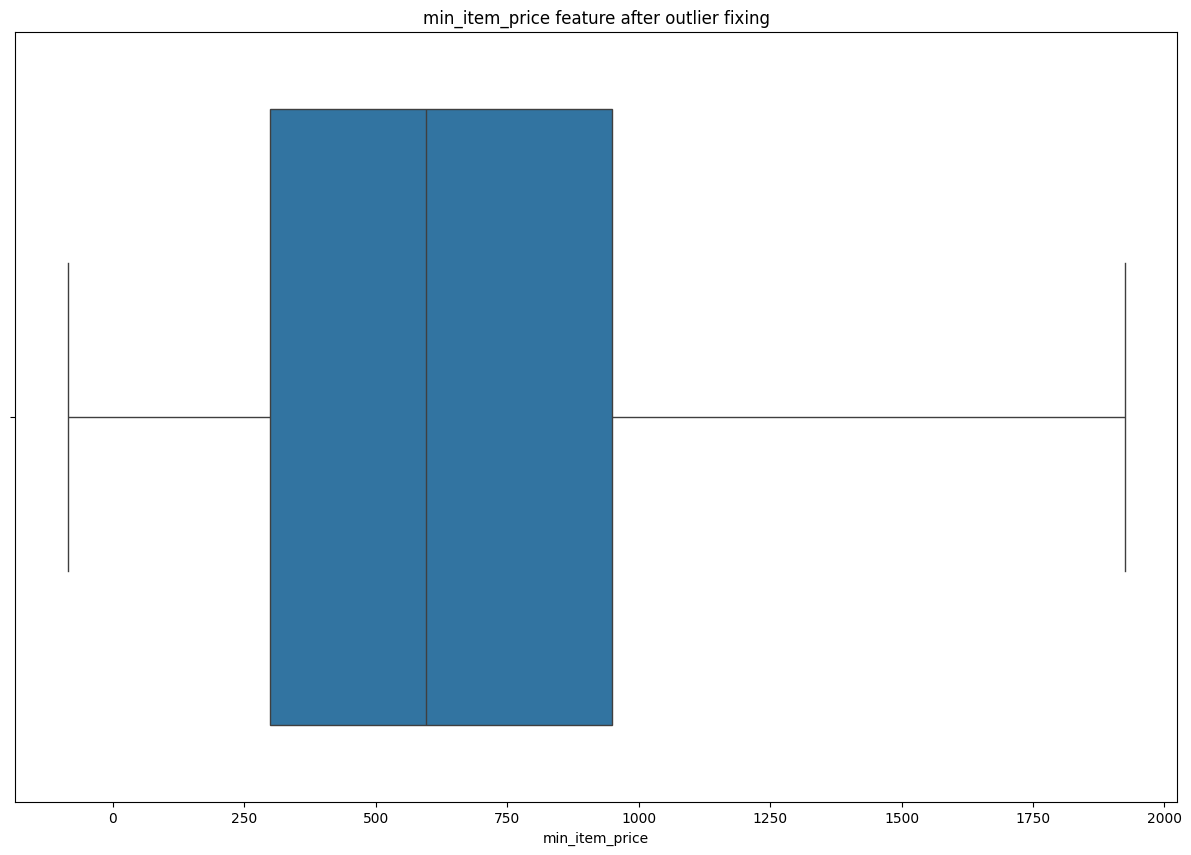

In [616]:
plt.figure(figsize=(15,10))
plt.title('min_item_price feature after outlier fixing')
sns.boxplot(x=df['min_item_price'])
plt.show()

## Skewness Analysis for Max Item Price Feature

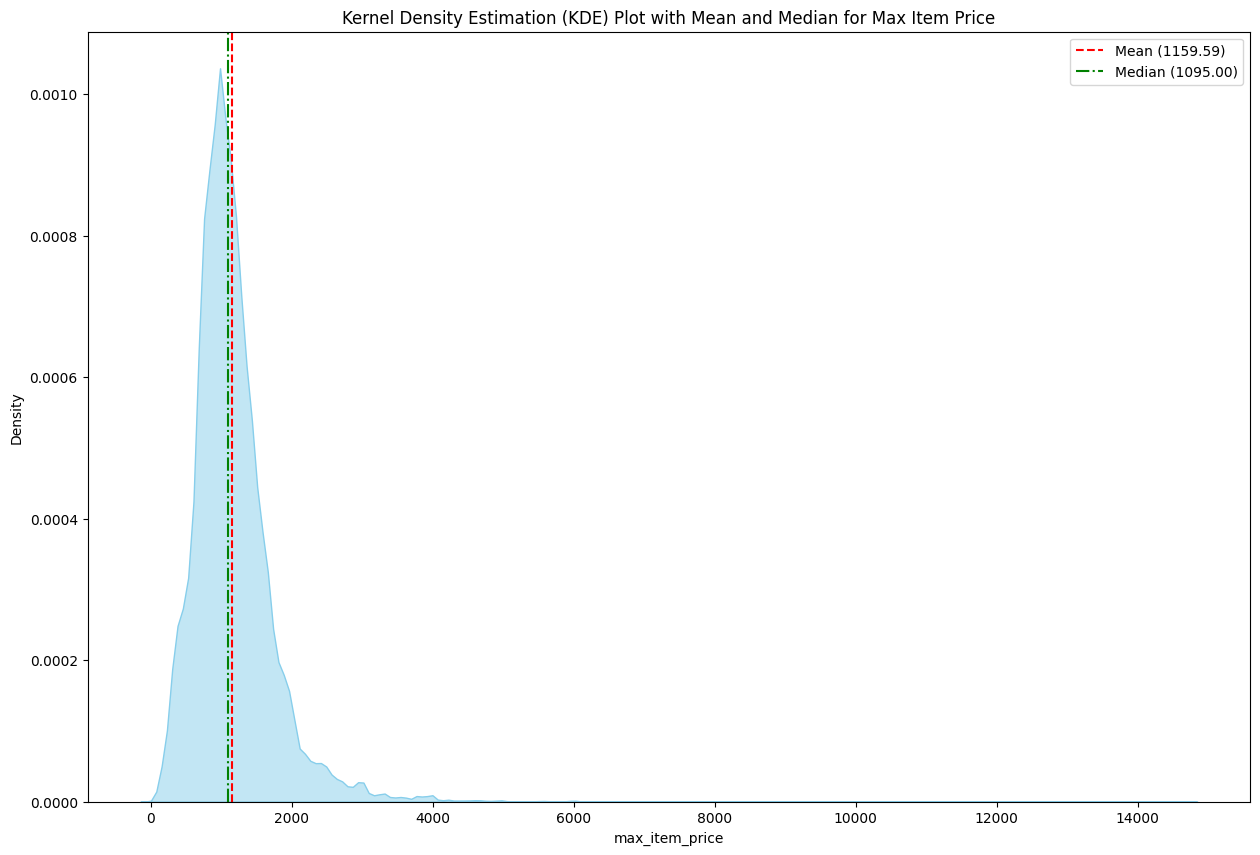

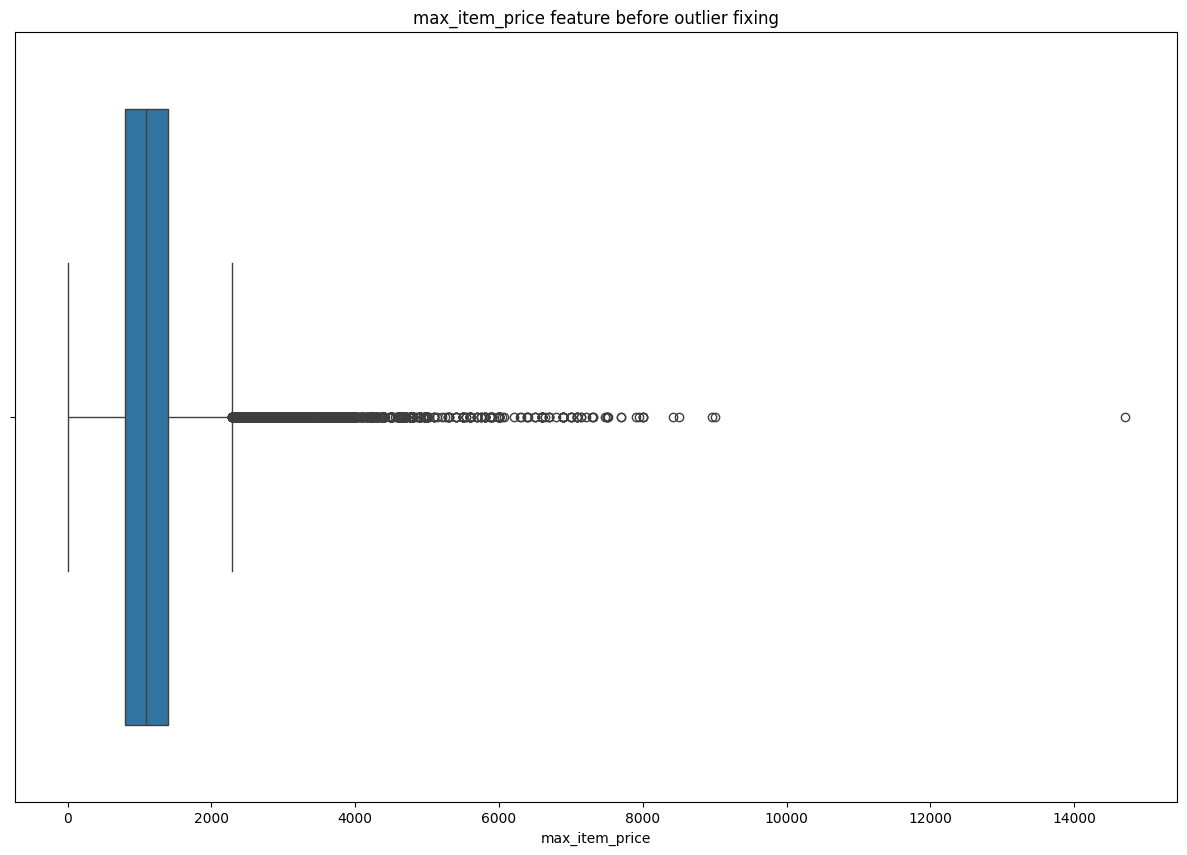

In [617]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='max_item_price', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['max_item_price'])
median_val = np.median(df['max_item_price'])

# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('max_item_price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot with Mean and Median for Max Item Price')

# Show legend
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(15,10))
plt.title('max_item_price feature before outlier fixing')
sns.boxplot(x=df['max_item_price'])
plt.show()

In [618]:
q1 = df['max_item_price'].quantile(0.25)
q3 = df['max_item_price'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['max_item_price'] = np.where(df['max_item_price']>right_wisker,right_wisker,df['max_item_price'])

left, right wisker : (-92.5, 2287.5)


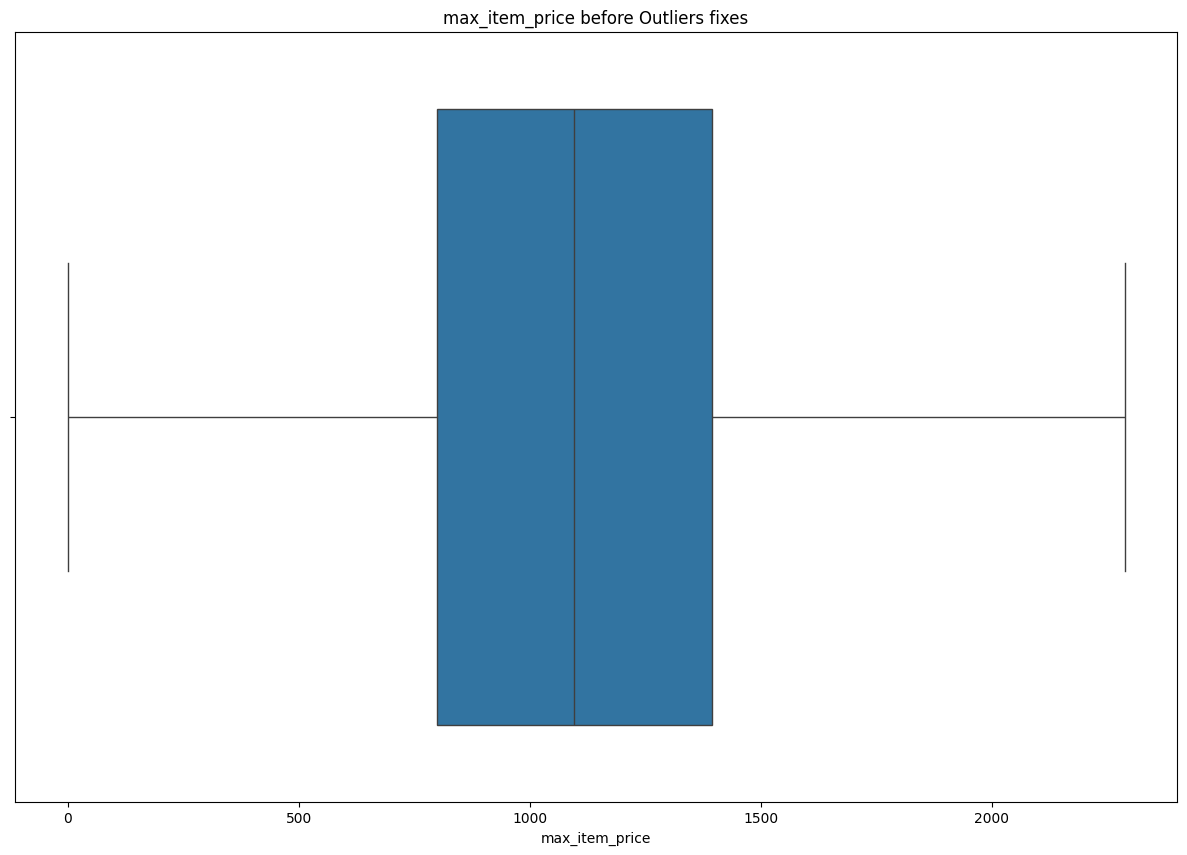

In [619]:
plt.figure(figsize=(15,10))
plt.title('max_item_price before Outliers fixes')
sns.boxplot(x=df['max_item_price'])
plt.show()

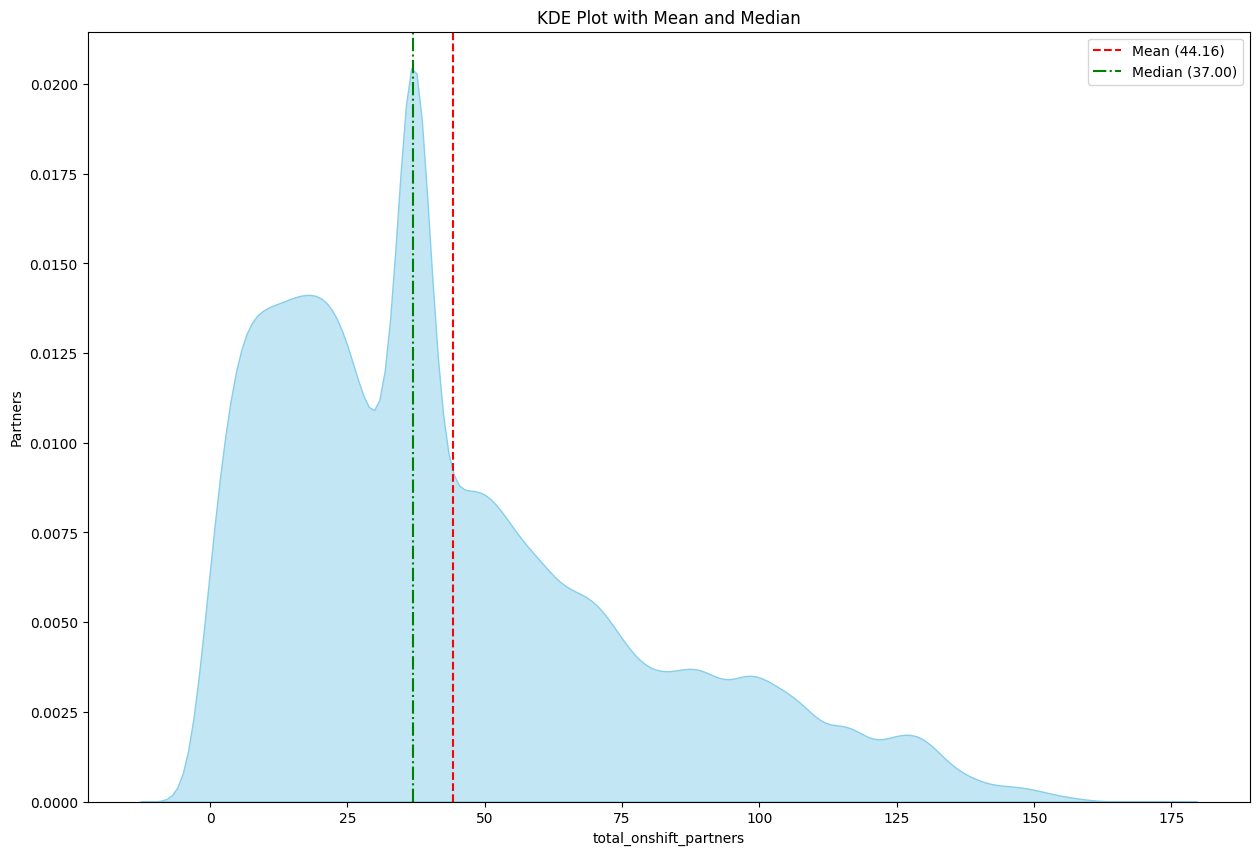

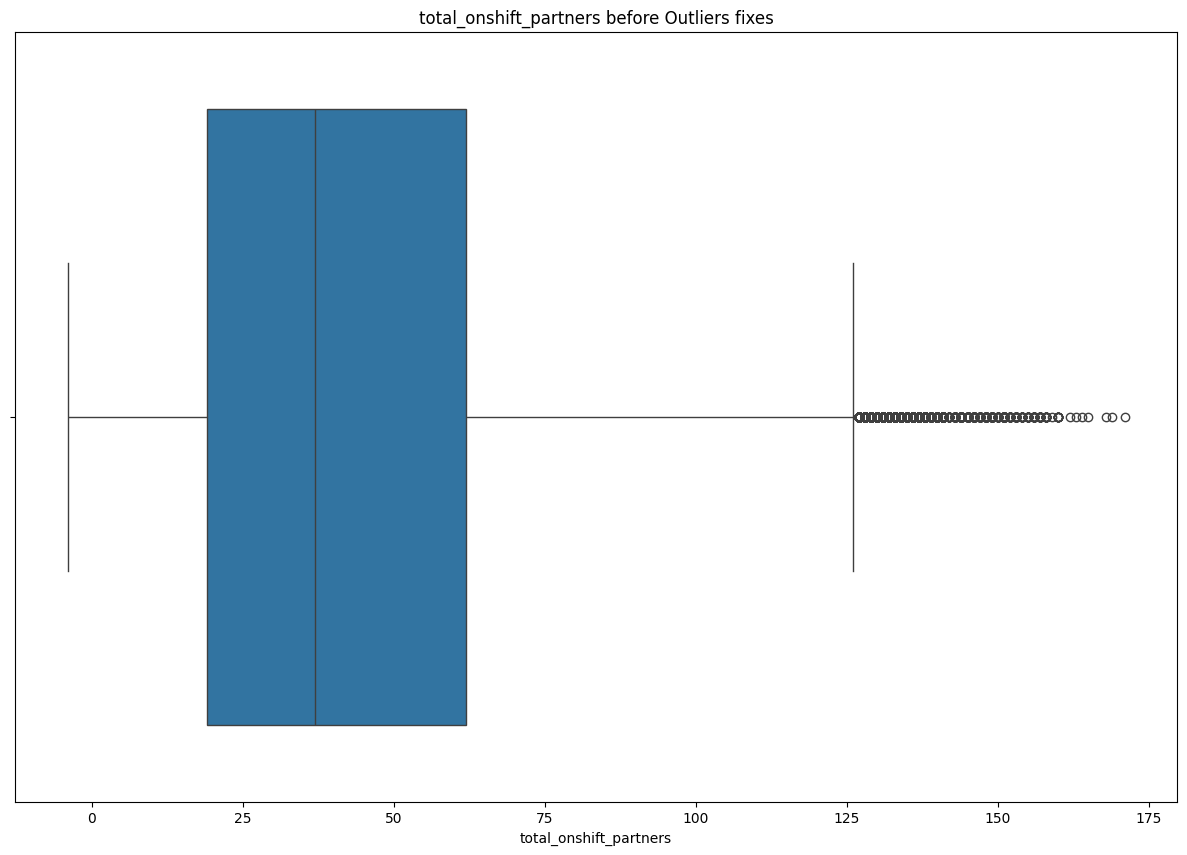

In [620]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='total_onshift_partners', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['total_onshift_partners'])
median_val = np.median(df['total_onshift_partners'])

# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2.0, p.get_height()), ha='center', va='bottom')


# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('total_onshift_partners')
plt.ylabel('Partners')
plt.title('KDE Plot with Mean and Median')

# Show legend
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(15,10))
plt.title('total_onshift_partners before Outliers fixes')
sns.boxplot(x=df['total_onshift_partners'])
plt.show()


In [621]:
q1 = df['total_onshift_partners'].quantile(0.25)
q3 = df['total_onshift_partners'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['total_onshift_partners'] = np.where(df['total_onshift_partners']>right_wisker,right_wisker,df['total_onshift_partners'])

left, right wisker : (-45.5, 126.5)


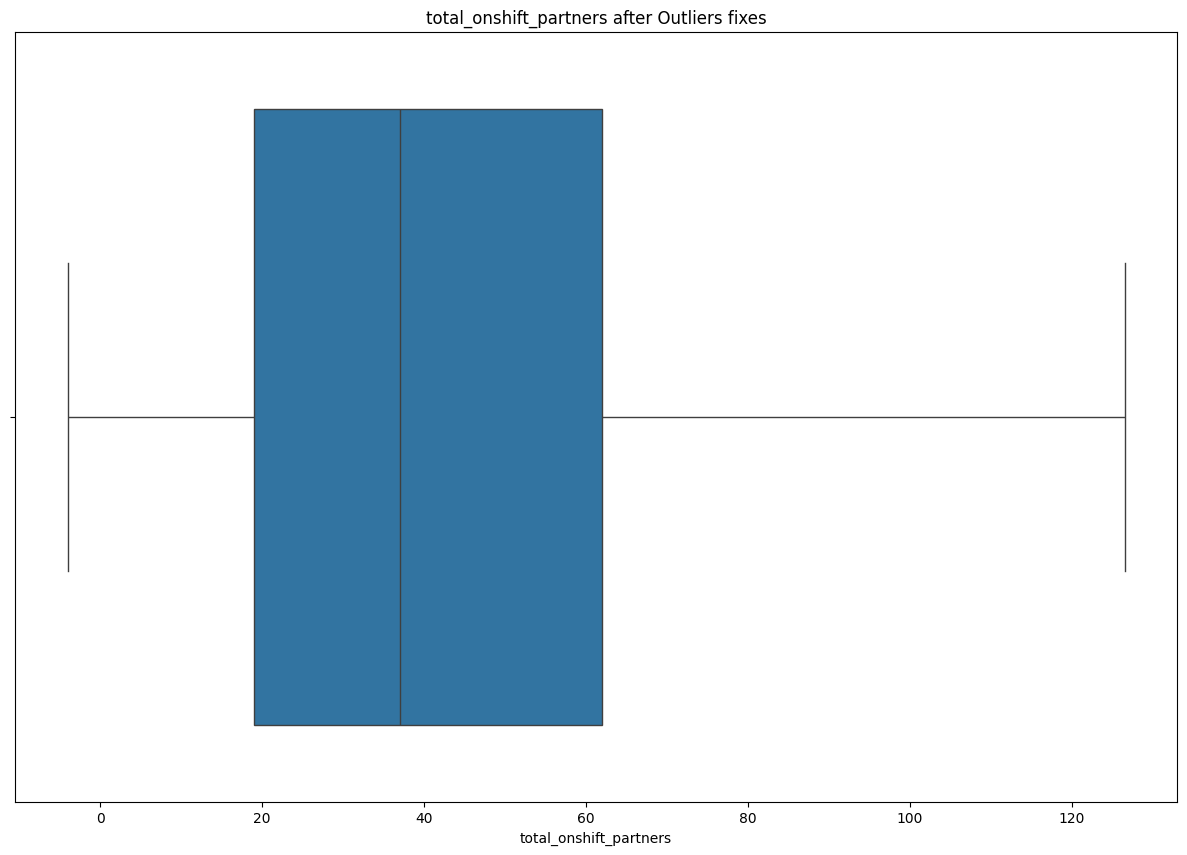

In [623]:
plt.figure(figsize=(15,10))
plt.title('total_onshift_partners after Outliers fixes')
sns.boxplot(x=df['total_onshift_partners'])
plt.show()

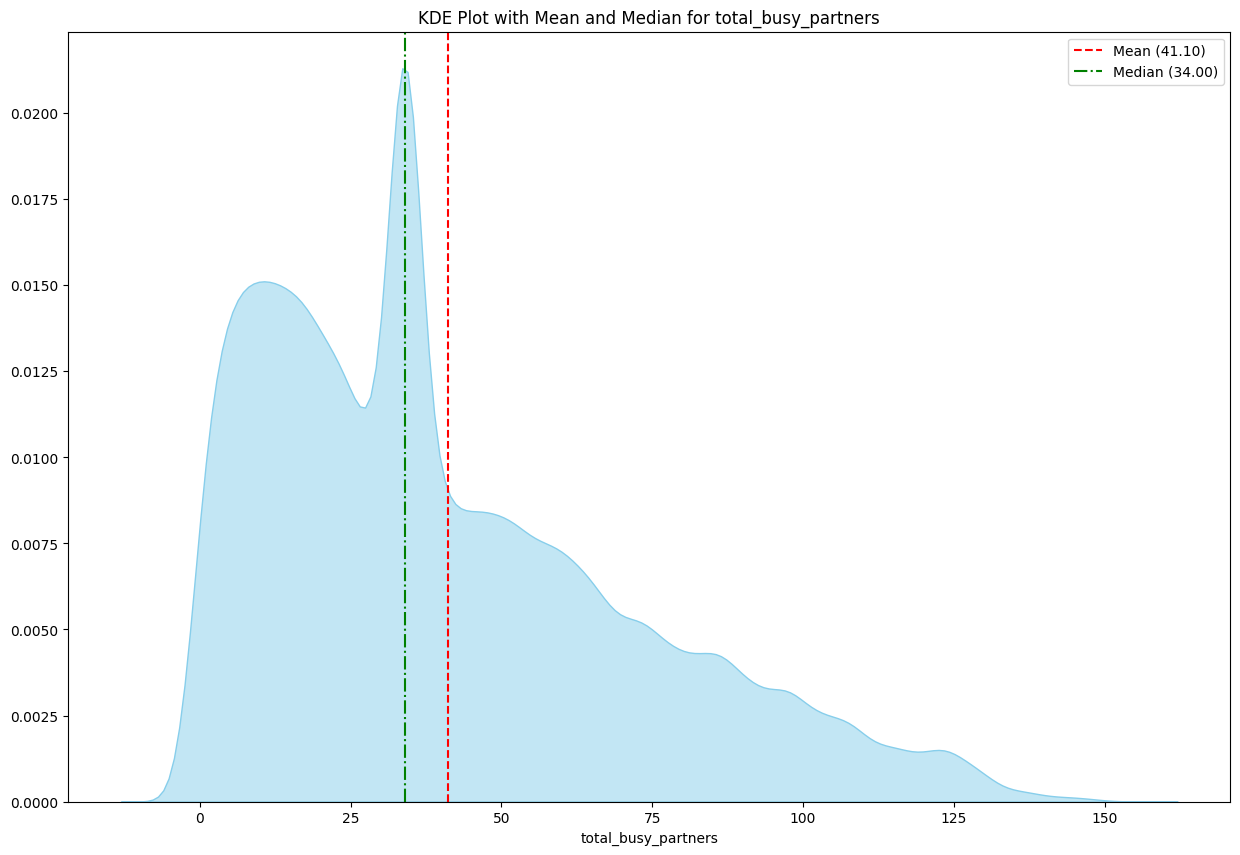

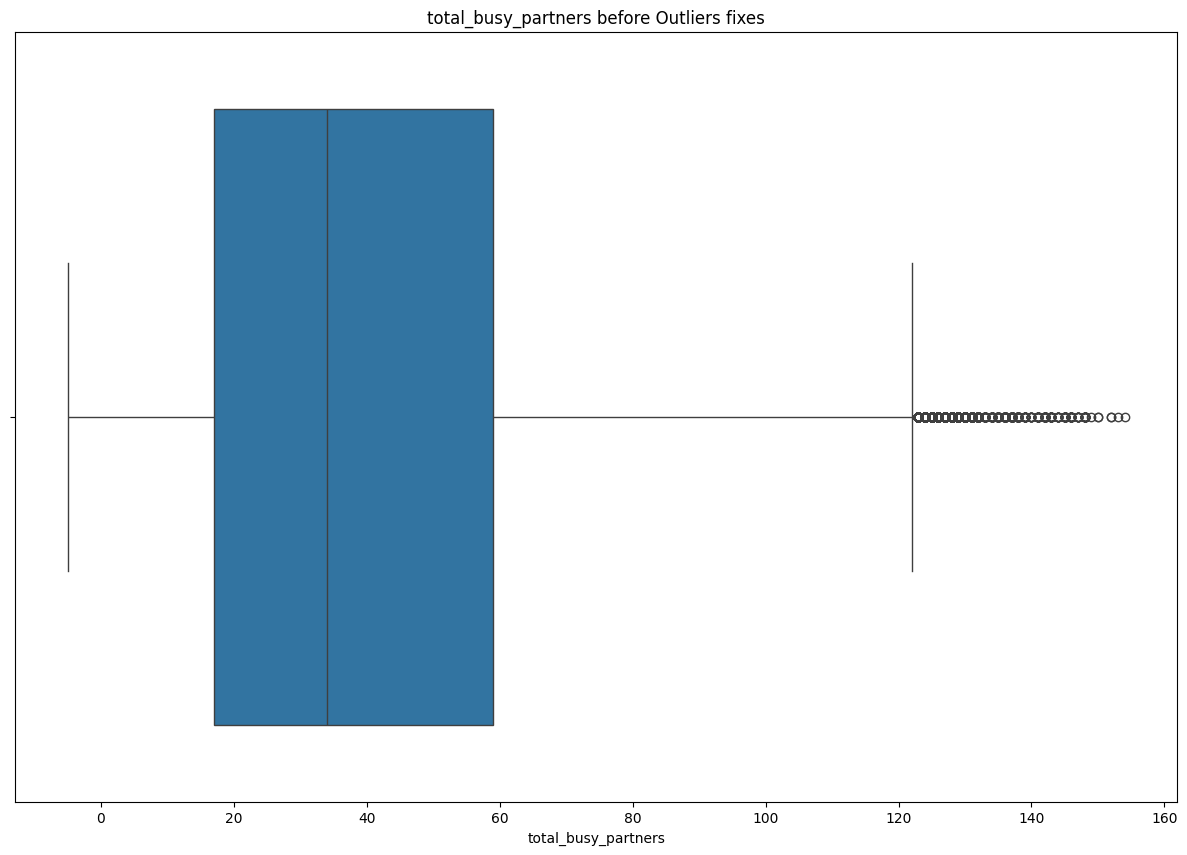

In [624]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='total_busy_partners', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['total_busy_partners'])
median_val = np.median(df['total_busy_partners'])

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2.0, p.get_height()), ha='center', va='bottom')


# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('total_busy_partners')
plt.ylabel('')
plt.title('KDE Plot with Mean and Median for total_busy_partners')

# Show legend
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(15,10))
plt.title('total_busy_partners before Outliers fixes')
sns.boxplot(x=df['total_busy_partners'])
plt.show()

In [625]:
q1 = df['total_busy_partners'].quantile(0.25)
q3 = df['total_busy_partners'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['total_busy_partners'] = np.where(df['total_busy_partners']>right_wisker,right_wisker,df['total_busy_partners'])

left, right wisker : (-46.0, 122.0)


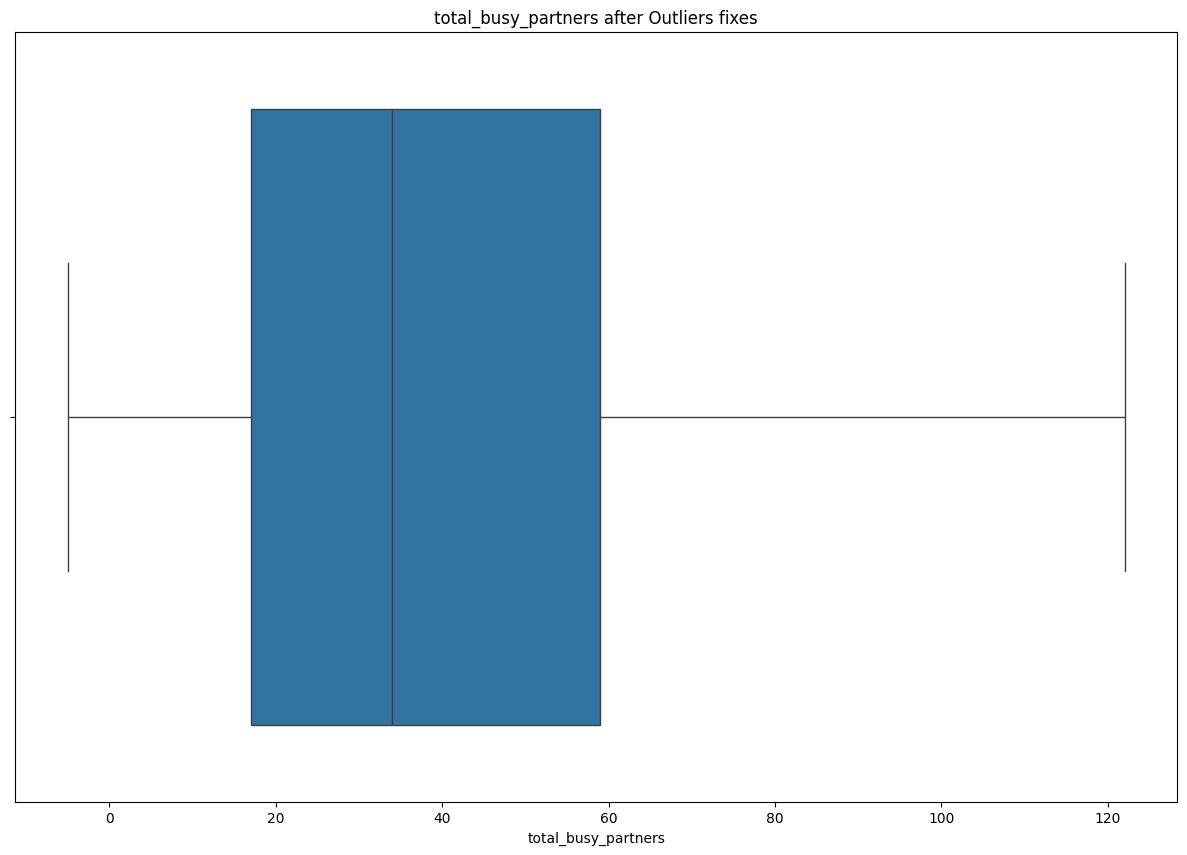

In [626]:
plt.figure(figsize=(15,10))
plt.title('total_busy_partners after Outliers fixes')
sns.boxplot(x=df['total_busy_partners'])
plt.show()

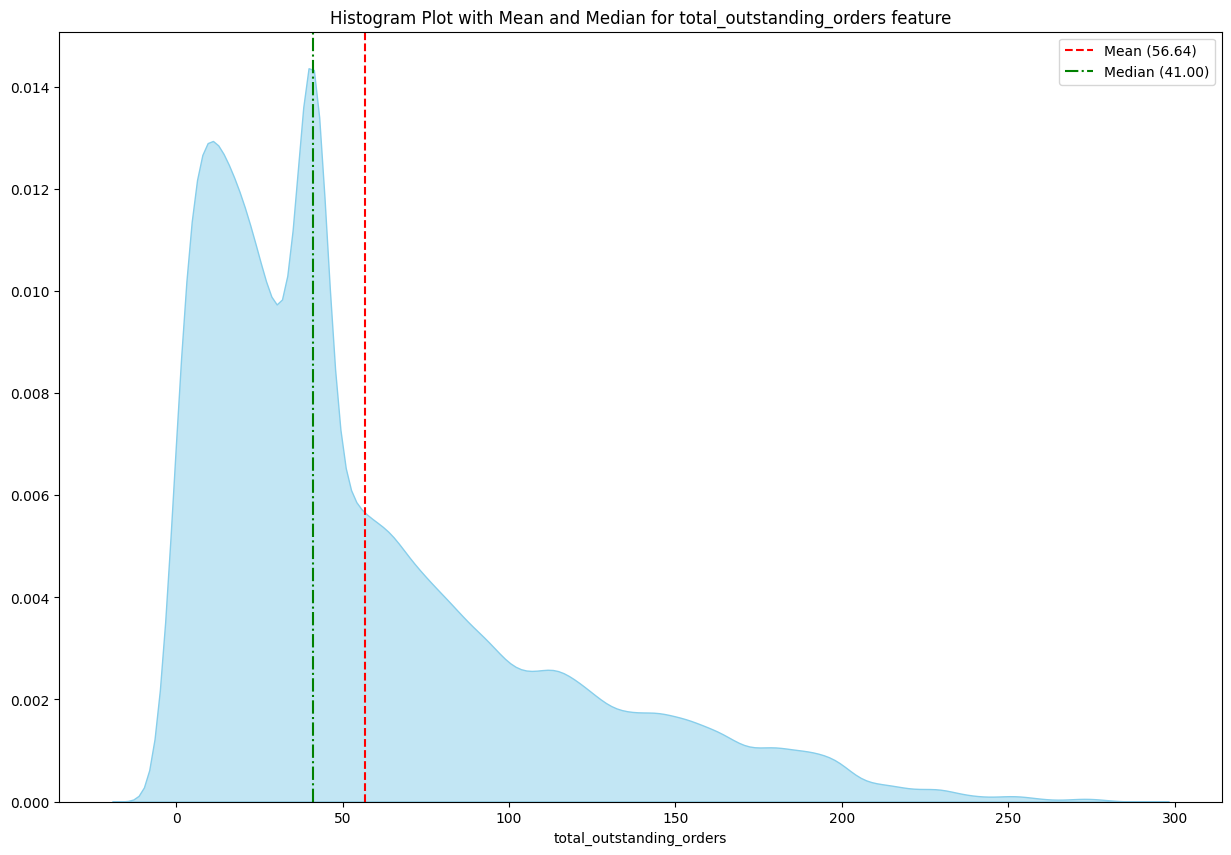

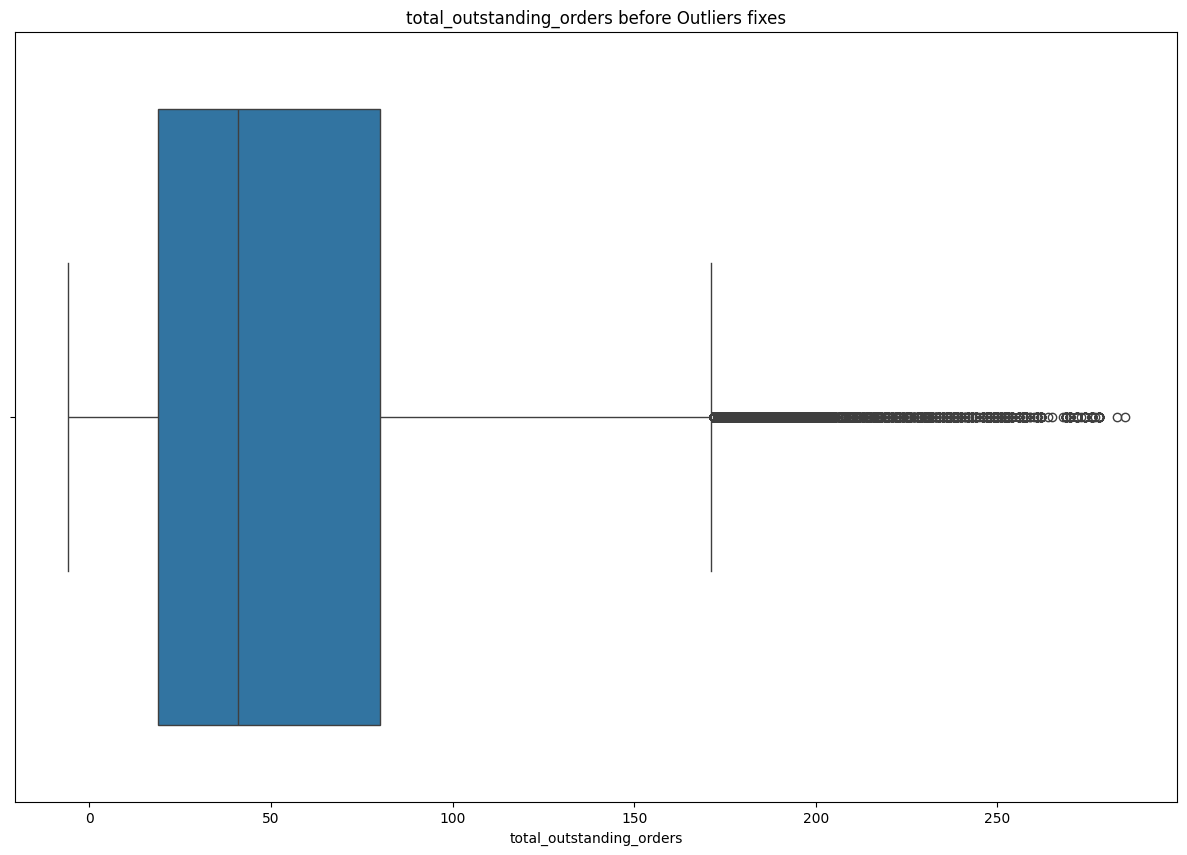

In [627]:
# Create the KDE plot
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df, x='total_outstanding_orders', fill=True, color='skyblue', alpha=0.5)

# Calculate mean and median
mean_val = np.mean(df['total_outstanding_orders'])
median_val = np.median(df['total_outstanding_orders'])

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2.0, p.get_height()), ha='center', va='bottom')


# Add vertical lines for mean and median
ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
ax.axvline(median_val, color='green', linestyle='-.', label=f'Median ({median_val:.2f})')

# Set labels and title
plt.xlabel('total_outstanding_orders')
plt.ylabel('')
plt.title('Histogram Plot with Mean and Median for total_outstanding_orders feature')

# Show legend
plt.legend()

# Show the plot
plt.show()
plt.figure(figsize=(15,10))
plt.title('total_outstanding_orders before Outliers fixes')
sns.boxplot(x = df['total_outstanding_orders'])
plt.show()

In [628]:
q1 = df['total_outstanding_orders'].quantile(0.25)
q3 = df['total_outstanding_orders'].quantile(0.75)
IQR = q3-q1
left_wisker = q1 - 1.5 * IQR
right_wisker = q3 + 1.5 * IQR
print(f'left, right wisker : {left_wisker,right_wisker}')
df['total_outstanding_orders'] = np.where(df['total_outstanding_orders']>right_wisker,right_wisker,df['total_outstanding_orders'])

left, right wisker : (-72.5, 171.5)


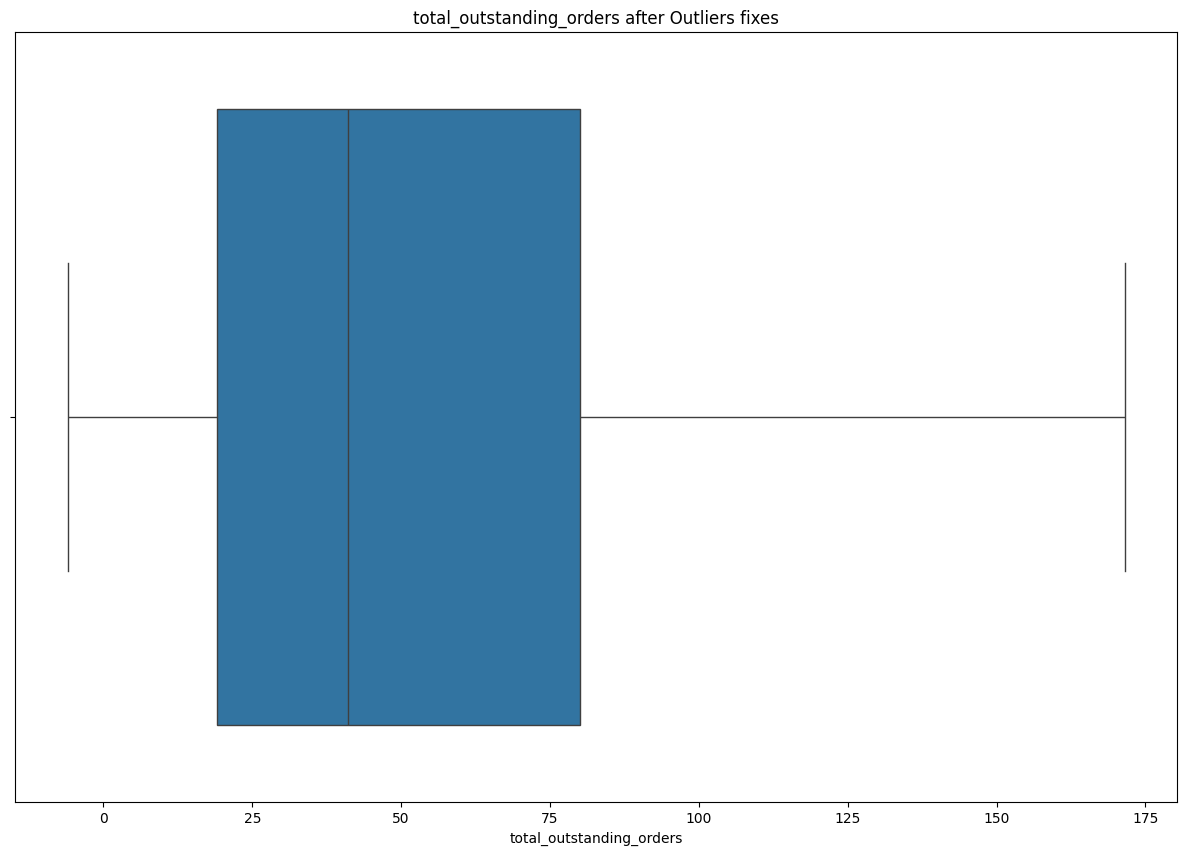

In [629]:
plt.figure(figsize=(15,10))
plt.title('total_outstanding_orders after Outliers fixes')
sns.boxplot(x = df['total_outstanding_orders'])
plt.show()

In [520]:
df.drop('market_id',axis=1, inplace=True)

In [521]:
from category_encoders import TargetEncoder

In [522]:
df['store_primary_category'] = TargetEncoder().fit_transform(df['store_primary_category'],df['delivery_time_minutes'])

In [523]:
df.head()

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_minutes,day_of_week,order_created_month,order_created_hour,order_delivery_hour,time_taken_to_delivery_hour
0,48.025105,1.0,4,3441.0,4,557.0,1239.0,33.0,14.0,21.0,62.98,4,2,22,23,1
1,44.602766,2.0,1,1900.0,1,1400.0,1400.0,1.0,2.0,2.0,67.07,1,2,21,22,1
2,49.749557,1.0,1,1900.0,1,1900.0,1900.0,1.0,0.0,0.0,29.68,3,1,20,21,1
3,49.749557,1.0,6,6387.5,5,600.0,1800.0,1.0,1.0,2.0,51.25,1,2,21,22,1
4,49.749557,1.0,3,3900.0,3,1100.0,1600.0,6.0,6.0,9.0,39.83,6,2,2,3,1


<Axes: >

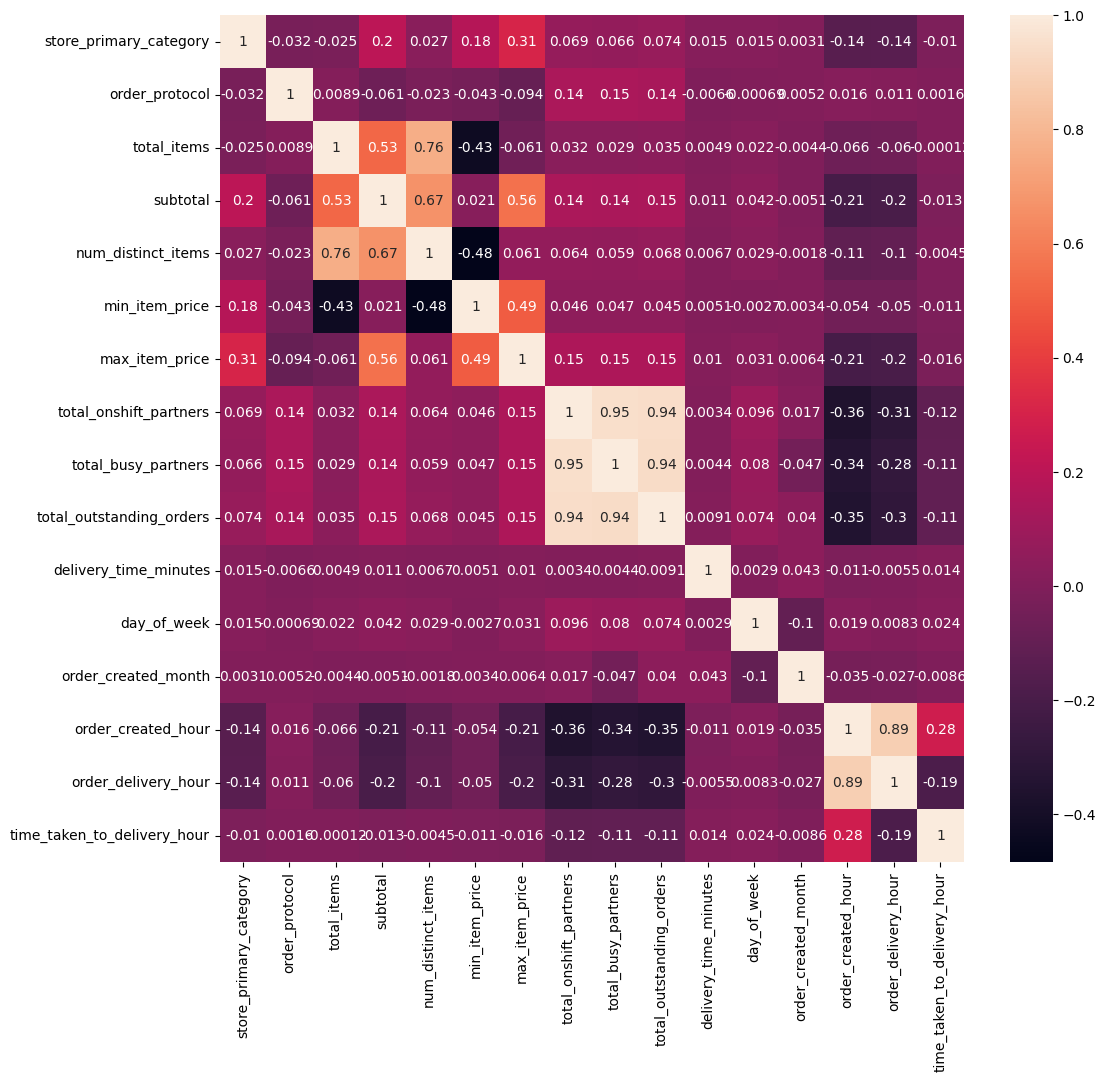

In [524]:
plt.figure(figsize=(12,11))
sns.heatmap(df.corr(),annot=True)

In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
def check_vif(df):
    tmp = df.columns
    df = StandardScaler().fit_transform(df)
    df = pd.DataFrame(df,columns=tmp)
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df["VIF"] = [round(variance_inflation_factor(df.values, i),2) for i in range(len(df.columns))]
    return vif_df,df

In [526]:
df_tmp = df.copy()

In [527]:
X = df.drop('delivery_time_minutes',axis=1)
Y = df['delivery_time_minutes']

In [528]:
vif_df,df = check_vif(X)

In [529]:
vif_df

,Features,VIF
0,store_primary_category,1.12
1,order_protocol,1.04
2,total_items,2.61
3,subtotal,3.81
4,num_distinct_items,4.23
5,min_item_price,2.13
6,max_item_price,2.48
7,total_onshift_partners,13.59
8,total_busy_partners,12.87
9,total_outstanding_orders,11.73


In [530]:
df.drop('total_onshift_partners',axis=1,inplace=True)

In [531]:
vif_df,df = check_vif(df)

In [532]:
vif_df

,Features,VIF
0,store_primary_category,1.12
1,order_protocol,1.04
2,total_items,2.61
3,subtotal,3.81
4,num_distinct_items,4.23
5,min_item_price,2.13
6,max_item_price,2.48
7,total_busy_partners,9.05
8,total_outstanding_orders,9.16
9,day_of_week,1.02


In [533]:
df.drop('total_outstanding_orders',axis=1,inplace=True)

In [534]:
vif_df,df = check_vif(df)
vif_df

,Features,VIF
0,store_primary_category,1.12
1,order_protocol,1.04
2,total_items,2.61
3,subtotal,3.80
4,num_distinct_items,4.23
5,min_item_price,2.13
6,max_item_price,2.48
7,total_busy_partners,1.19
8,day_of_week,1.02
9,order_created_month,1.02


In [535]:
df.drop('order_created_hour',axis=1,inplace=True)
vif_df,df = check_vif(df)
vif_df

,Features,VIF
0,store_primary_category,1.12
1,order_protocol,1.04
2,total_items,2.61
3,subtotal,3.80
4,num_distinct_items,4.23
5,min_item_price,2.13
6,max_item_price,2.48
7,total_busy_partners,1.18
8,day_of_week,1.02
9,order_created_month,1.01


In [536]:
df.shape

(197421, 12)

In [537]:
df.head()

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_busy_partners,day_of_week,order_created_month,order_delivery_hour,time_taken_to_delivery_hour
0,-0.093025,-1.243699,0.301376,0.557004,0.815344,-0.249754,0.226276,-0.883125,0.381804,0.728128,1.730476,-0.118838
1,-0.807830,-0.579639,-0.823675,-0.454813,-1.024857,1.625521,0.574103,-1.275674,-1.084648,0.728128,1.610807,-0.118838
2,0.267151,-1.243699,-0.823675,-0.454813,-1.024857,2.737784,1.654308,-1.341098,-0.107013,-1.371177,1.491139,-0.118838
3,0.267151,-1.243699,1.051410,2.491669,1.428744,-0.154099,1.438267,-1.308386,-1.084648,0.728128,1.610807,-0.118838
4,0.267151,-1.243699,-0.073641,0.858383,0.201944,0.958163,1.006185,-1.144824,1.359439,0.728128,-0.662892,-0.118838


In [538]:
from sklearn.model_selection import train_test_split as tts 
xtrain_val,xval,ytrain_val,yval = tts(df,Y,test_size=0.2,random_state=42)

xtrain,xtest,ytrain,ytest = tts(xtrain_val,ytrain_val,test_size=0.2,random_state=42)


In [539]:
print(f'train shape : {xtrain.shape},{ytrain.shape}')
print(f'test shape : {xtest.shape},{ytest.shape}')
print(f'val shape : {xval.shape},{yval.shape}')

train shape : (126348, 12),(126348,)
test shape : (31588, 12),(31588,)
val shape : (39485, 12),(39485,)


In [540]:
from tensorflow.keras.layers import Dense,Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu

In [570]:
L2reg = tf.keras.regularizers.L2(l2=1e-6)
model = Sequential(
    [

        Dense(256,input_shape=(xtrain.shape[1],)),
        BatchNormalization(),
        Activation(relu),
        Dropout(0.2),

        Dense(128,kernel_regularizer=L2reg),
        BatchNormalization(),
        Activation(relu),
        Dropout(0.3),

        Dense(64,kernel_regularizer=L2reg),
        BatchNormalization(),
        Activation(relu),
        Dropout(0.1),

        Dense(32,kernel_regularizer=L2reg),
        BatchNormalization(),
        Activation(relu),
        Dropout(0.1),

        Dense(64,kernel_regularizer=L2reg),
        BatchNormalization(),
        Activation(relu),

        Dense(1,activation='linear')

    ]


)

In [571]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               3328      
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                     

In [572]:
from tensorflow.keras.callbacks import EarlyStopping

In [573]:
optimizers = Nadam()
loss = tf.keras.losses.Huber()
call_backs = EarlyStopping(monitor="val_loss",patience=5)
model.compile(optimizer=optimizers,loss=loss)

In [574]:
hist = model.fit(xtrain,ytrain,epochs=500,validation_data=(xval,yval),batch_size=256,verbose=1,callbacks=[call_backs])


Epoch 1/500


494/494 [==============================] - 14s 20ms/step - loss: 35.5876 - val_loss: 16.5625
Epoch 2/500
494/494 [==============================] - 9s 19ms/step - loss: 12.8314 - val_loss: 10.4252
Epoch 3/500
494/494 [==============================] - 9s 19ms/step - loss: 11.5161 - val_loss: 10.1553
Epoch 4/500
494/494 [==============================] - 10s 20ms/step - loss: 11.3749 - val_loss: 10.0455
Epoch 5/500
494/494 [==============================] - 11s 22ms/step - loss: 11.2871 - val_loss: 10.0611
Epoch 6/500
494/494 [==============================] - 10s 21ms/step - loss: 11.2374 - val_loss: 10.0143
Epoch 7/500
494/494 [==============================] - 10s 21ms/step - loss: 11.1992 - val_loss: 9.9561
Epoch 8/500
494/494 [==============================] - 10s 21ms/step - loss: 11.1483 - val_loss: 9.8490
Epoch 9/500
494/494 [==============================] - 10s 21ms/step - loss: 11.1309 - val_loss: 9.7985
Epoch 10/500
494/494 [==============================] - 10s 21ms/step - 

In [575]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

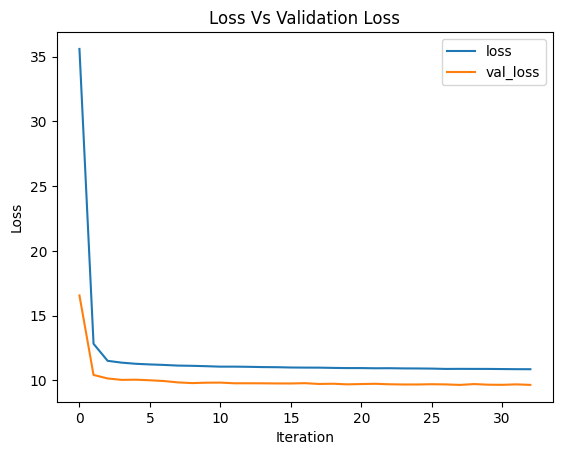

In [576]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.title('Loss Vs Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [585]:
# model.save('proter_reg.h5')

In [577]:
model.evaluate(xtest,ytest)

988/988 [==============================] - 4s 4ms/step - loss: 9.5698


9.569809913635254

In [578]:
y_pred = model.predict(xtest)

988/988 [==============================] - 4s 4ms/step


In [579]:
y_pred = y_pred.reshape(-1)
y_pred

array([44.809242, 61.13754 , 45.460415, ..., 32.036903, 47.99863 ,
       40.375557], dtype=float32)

In [580]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,root_mean_squared_error

In [581]:
print(f' R2 Score : {r2_score(ytest,y_pred)}')

 R2 Score : 0.47361300590838007


In [582]:
print(f'MSE : {mean_squared_error(ytest,y_pred)}')
print(f'MAE : {mean_absolute_error(ytest,y_pred)}')
print(f'RMSE : {root_mean_squared_error(ytest,y_pred)}')

MSE : 202.07368125973795
MAE : 10.05683023617481
RMSE : 14.215262264894656


# Questions

`1. Defining the problem statements and where can this and modifications of this be used?`

Ans : This modification can we used in giving tentative time line for all users.


`2. List 3 functions the pandas datetime provides with one line explanation?`

Ans :

1. pd.to_datetime() -> this helps to convert the data in datetime so that we can pull relvant information from timestamp data.
2. pd.series.dt.month() -> This function is used to pull month from timestamp data

3. pd.series.dt.year() -> This function is used to pull year from timestamp

`3. Why do we need to check for outliers in our data?`

ans : It is important to check for outliers in data because it hampers the model tranining.


`4. Name 3 outlier removal methods?`

Ans : 
1. IQR method -> this method is used to find outlier using quartile calculation.
2. Z-score method -> this method is used to replace outliers with zscore.
3. Median imputation method -> this method is used to replace outliers with median of data.


`5. What classical machine learning methods can we use for this problem?`

Ans :  Since this problem is all about predicting delivery time as per features, so here we can utlize Linear Regression algorithm.

`6. Why is scaling required for neural networks?`

Ans :  Scaling is important because if we don't have scale data then weight update may get hamper and due to that learning for model can go wrong.


`7 .Briefly explain your choice of optimizer?`

Ans :  For training model I have utilized NADAM algo, because it helps model to coverge faster by choosing less deviated vector and due to this enhancement model converge faster than any other algorithm.

`8. Which activation function did you use and why?`

Ans : I have utilized RELU activation function, because of  following points
        1. This is non-linear function which helps model to learn different features by creating different combination by its own.
        
        2. It helps in penalizing -ve values which helps model to learn effectively all features.
        
9. Why does a neural network perform well on a large dataset?

Ans : The computational efficiency of a neural network is higher than any ML algorithm, due to this feature Neural network performs well on a large dataset.